# **Question 4 - Rebuild the models**
- Which attributes relate strongly to the outcome of loan status? 
- using Random Forest

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Prepare data for training and test



In [4]:
#import X and y from data_cleaning.ipynb
%store -r X
%store -r y

#Use only the selected features
selected_features = ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History_0.0', 'Credit_History_1.0']
X = X[selected_features]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.head())
print(y_train.head())

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History_0.0  \
479             0.2812      0.5651            0.7436                   0   
419             0.2486      0.5243            0.7436                   0   
66              0.3954      0.4660            0.3590                   1   
376             0.8763      0.4854            0.7436                   0   
29              0.3654      0.4369            0.7436                   0   

     Credit_History_1.0  
479                   1  
419                   1  
66                    0  
376                   1  
29                    1  
479    N
419    Y
66     N
376    Y
29     Y
Name: Loan_Status, dtype: object


# **Decision Tree**

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

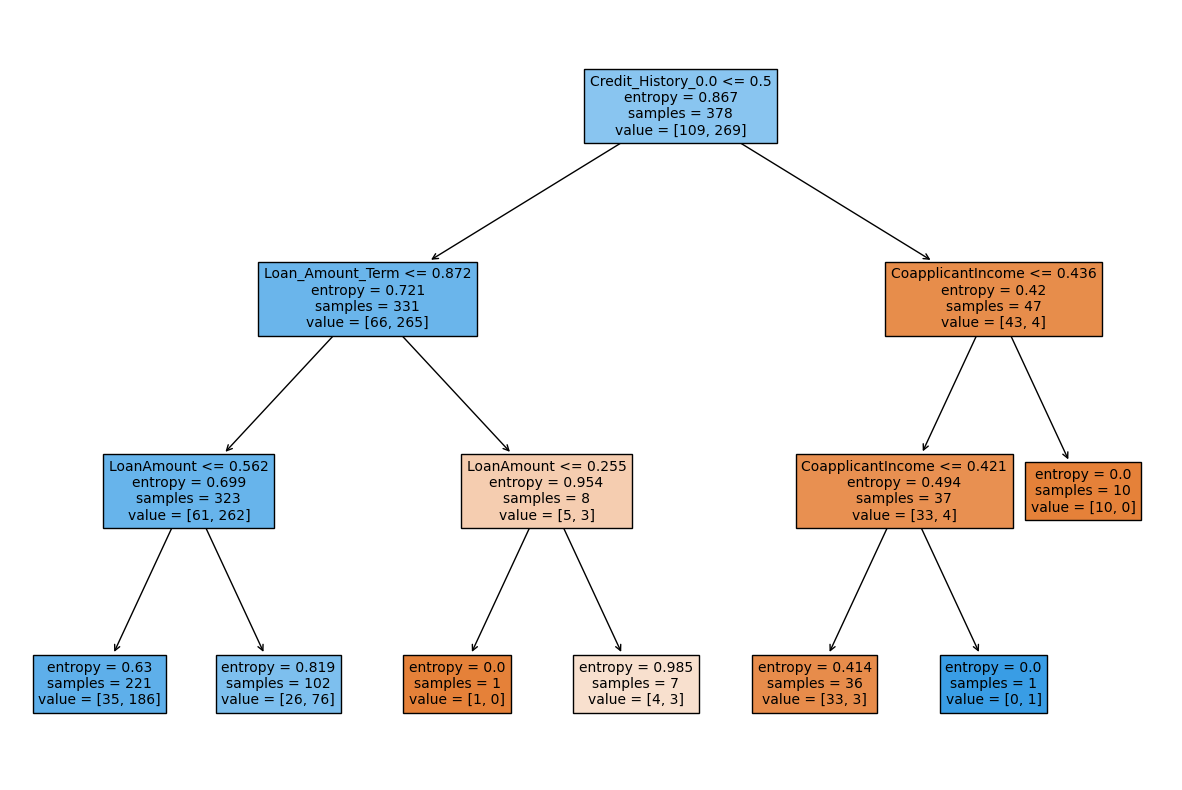

-----------

[[ 31  25]
 [  3 104]]


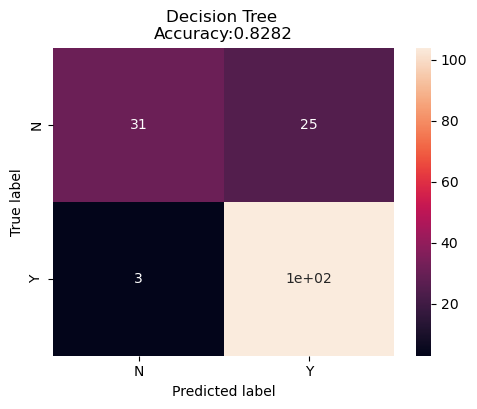

In [7]:
#Visualize the tree with features name
from sklearn import tree
features = X.columns
class_names = ['N', 'Y']
plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

#Predict the test set results
y_pred = dt.predict(X_test)

#Creates confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("-----------\n")
print(cm)

#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = ['N', 'Y'], columns = ['N', 'Y'])

#Print confusion matrix as heatmap
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('Decision Tree \nAccuracy:{0:.4f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



# **Naive Bayes**

In [8]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

              precision    recall  f1-score   support

           N       0.97      0.57      0.72        56
           Y       0.82      0.99      0.89       107

    accuracy                           0.85       163
   macro avg       0.89      0.78      0.81       163
weighted avg       0.87      0.85      0.83       163

-----------

[[ 32  24]
 [  1 106]]


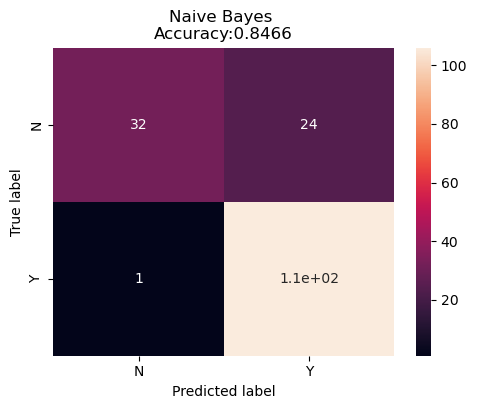

In [9]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#Creates confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("-----------\n")
print(cm)

#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = ['N', 'Y'], columns = ['N', 'Y'])

#Print confusion matrix as heatmap
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot = True)
plt.title('Naive Bayes \nAccuracy:{0:.4f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# **Neural Network**

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim = 5, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = 'sigmoid'))

#transform Y, N to 0, 1
y_train = y_train.replace({'N':0, 'Y':1})
y_test = y_test.replace({'N':0, 'Y':1})

In [11]:
#compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#train the model
model.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.5744 - accuracy: 0.7116
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7196
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7937
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.8148
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.8148
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.8148
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.8148
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.8148
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.8148
Epoch 10/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.8148
Epoch 11/

In [12]:
#evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print("\n")

6/6 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8466
Test loss:  0.4048301875591278
Test accuracy:  0.8466257452964783


